In [4]:
#copied from hmmlearn examples # 2

"""
Gaussian HMM of stock data
--------------------------
This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.
"""

%matplotlib inline
import matplotlib.pylab
from __future__ import print_function
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM

fitting to HMM and decoding ...done
Transition matrix
[[  7.21583978e-01   1.50705769e-32   9.44149279e-02   9.30047634e-04
    1.56354475e-01   2.67165707e-02]
 [  2.06618721e-13   9.77592545e-01   2.77310173e-03   1.96343537e-02
    7.74562860e-12   4.25151107e-29]
 [  2.49042163e-02   6.02590816e-12   6.11696579e-01   5.58141666e-03
    2.14791629e-01   1.43026159e-01]
 [  1.48842956e-54   2.67413245e-01   8.82534254e-07   3.99042216e-01
    4.99265961e-37   3.33543656e-01]
 [  9.35027970e-02   3.30362782e-03   1.59273151e-01   7.60605409e-15
    7.23033135e-01   2.08872887e-02]
 [  5.46115518e-03   1.37329691e-26   3.42030705e-01   2.45475196e-02
    6.15457018e-02   5.66414918e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  6.66388940e-03   4.10618580e+07]
var =  [  2.67283920e-02   9.45693968e+13]

1th hidden state
mean =  [  2.49043576e-02   4.96517779e+07]
var =  [  7.52753852e-01   2.49627779e+14]

2th hidden state
mean =  [  8.54421207e-03   7.53764427e

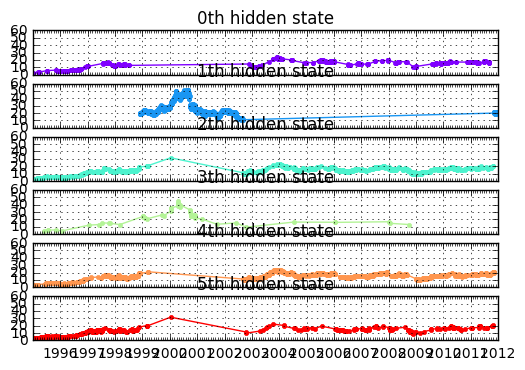

In [5]:
# Get quotes from Yahoo! finance
quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2012, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

###############################################################################
# Print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()